# Early Universe Physical Cosmology
#### Caltech - ph2c (Spring 2015)
https://piazza.com/caltech/spring2015/ph2c/home
### Intro to Statistical Physics and Thermodynamics

In [41]:
# Loading needed libraries and setting up preferences
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.constants as const


# Update the matplotlib configuration parameters:
plt.rcParams.update({'font.size': 22,
                     'font.family': 'sans',
                     'figure.figsize': (10, 8),
                     'axes.grid': True,
                     'grid.color': '#555555'})


## Comparison of COBE Observations with Blackbody formula

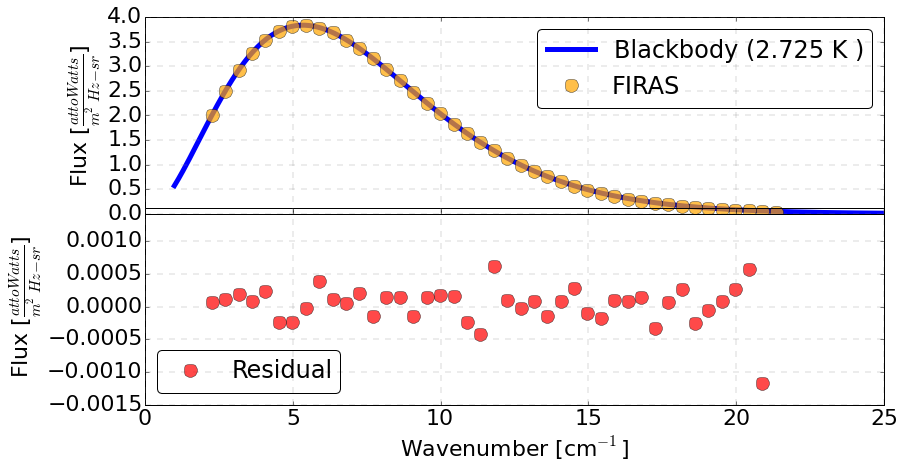

In [68]:
# load the data from the FIRAS instrument on the COBE satellite
# http://lambda.gsfc.nasa.gov/product/cobe/firas_monopole_get.cfm
[nu, S, res, sigma, Sgalaxy] = np.loadtxt('firas_monopole_spec_v1.txt', unpack=True)

h = const.h
c = const.c
kB = const.k
ec = const.e

def Snu(nu, T):
    y = (1/c)*(2*h * nu**3 * c**2) / (np.exp(h * c * nu/ (kB*T)) - 1)
    return y

nuu = np.linspace(1, 25, 333) *100

fig = plt.figure(figsize=(13,7))
ax1 = plt.subplot(211)

plt.plot(nuu/100, 1e18*Snu(nuu, 2.725), color='Blue', lw=5, label=r'Blackbody (2.725 K )')
plt.plot(nu, S*1e-2, linestyle='None', marker='o', markersize=13, mfc='Orange',alpha=0.71, label='FIRAS')
ax1.xaxis.set_ticklabels([])
plt.grid(color='gray', alpha=0.15, linestyle='dashed', linewidth=2)
plt.ylabel(r'Flux [$\frac{attoWatts}{m^2 Hz - sr}$]')

plt.legend(loc='best', fontsize=24, numpoints=1, fancybox=True)

ax2 = plt.subplot(212)
plt.plot(nu, (S*1e-20 - Snu(nu*100, 2.725))*1e18, linestyle='None', 
         marker='o', markersize=13, mfc='Red',alpha=0.71,
         label='Residual')
plt.ylim((-1.5e-3, 1.5e-3))
plt.grid(color='gray', alpha=0.15, linestyle='dashed', linewidth=2)
plt.ylabel(r'Flux [$\frac{attoWatts}{m^2 Hz - sr}$]')
plt.xlabel(r'Wavenumber [cm$^{-1}$]')
plt.legend(loc='lower left', fontsize=24, numpoints=1, fancybox=True)
ax2.set_yticks(ax2.get_yticks()[:-1])

plt.tight_layout(h_pad=-0.74)
plt.savefig("COBE_FIRAS.pdf", bbox_inches='tight')
plt.show()

### Relative Abundance of neutrons and protons

m_n - (m_p + m_e) = 0.782 MeV


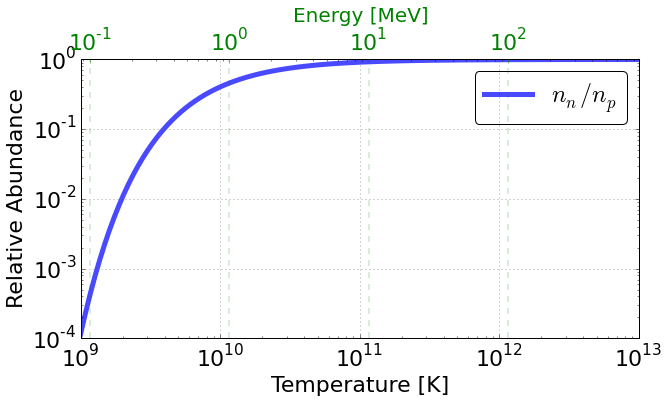

In [43]:
deltaM = (const.m_n - const.m_p - const.m_e)*const.c**2
print 'm_n - (m_p + m_e) = ' + str(round(deltaM/const.e/1e6,3)) + " MeV"

Tmin = 1e9
Tmax = 1e13

T = np.logspace(np.log10(Tmin), np.log10(Tmax), 233) 
rel_n = np.exp(-deltaM/(kB * T))


fig3 = plt.figure(figsize=(10,5))
ax1 = plt.subplot(111)
plt.loglog(T, rel_n, linestyle='-', lw=5, alpha=0.71, label='$n_n/n_p$')
plt.ylabel('Relative Abundance')
plt.xlabel('Temperature [K]')
plt.xlim((Tmin, Tmax))
plt.legend(loc='best', fontsize=24, numpoints=1, fancybox=True)

ax2 = plt.twiny()
plt.xlabel('Energy [MeV]', fontsize=20, color='Green')

ax2.xaxis.tick_top()
ax2.set_xscale('log')
ax2.set_xlim([Tmin*kB/ec/1e6, Tmax*kB/ec/1e6])
plt.grid(color='green', alpha=0.15, linestyle='dashed', linewidth=2)
ax2.tick_params(axis='x', colors='Green')


plt.savefig("NeutronAbundance.pdf", bbox_inches='tight')
plt.show()

### Temperature as a function of Cosmic Time

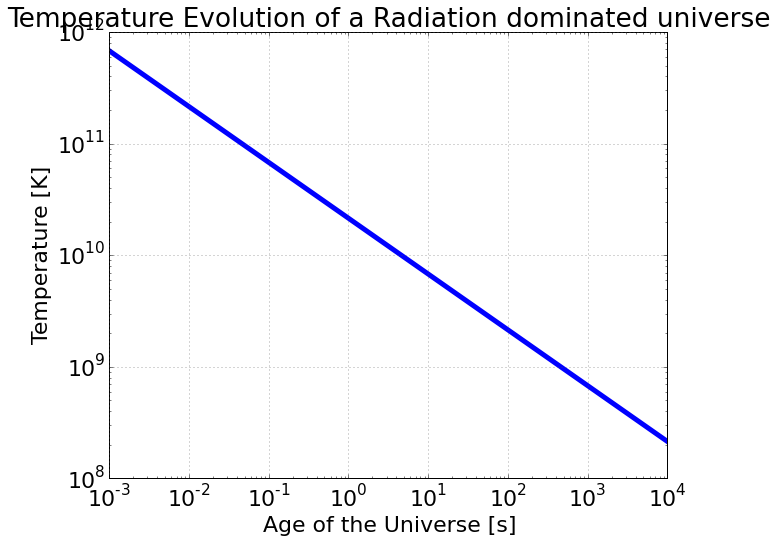

In [65]:
t = np.logspace(-3,4,333)

T = ((3*const.c**3)/(32*np.pi*const.G*const.sigma))**(1/4) * t**(-1/2)

fig4 = plt.figure()
plt.loglog(t, T, lw=5)
plt.xlabel(r'Age of the Universe [s]')
plt.ylabel('Temperature [K]')
plt.title(r'Temperature Evolution of a Radiation dominated universe')

plt.savefig("TemperatureCosmic.pdf", bbox_inches='tight')
plt.show()

### Further Reading
1. ["Physical Cosmology"](http://press.princeton.edu/titles/5263.html), by PJE Peebles
1. ["Statistical Mechanics", by Pathria](https://books.google.com/books?id=KdbJJAXQ-RsC&dq=pathria+statistical+mechanics&source=gbs_navlinks_s)
1. http://en.wikipedia.org/wiki/Big_Bang_nucleosynthesis
1. [The Saha Equation](http://www.cambridge.org/resources/0521846560/7706_Saha%20equation.pdf), by Hale Bradt (MIT)
1. [Ned Wright's Cosmology Tutorial](http://www.astro.ucla.edu/~wright/cosmoall.htm)
1. [Cole Miller's BBN Lecture notes](http://www.astro.umd.edu/~miller/teaching/astr422/lecture24.pdf)
1. [Jim Brau's LEcture Notes](http://pages.uoregon.edu/jimbrau/astr123/Notes/Chapter27.html)

In [64]:
(2.16)**(4)

21.767823360000005